### Amazon Product Recommendation System — Industry Case Study

This project builds and evaluates a hybrid recommendation engine for an e-commerce platform using both content-based and collaborative filtering techniques.

### Problem Statement

    Build a smart recommendation system using product metadata and user behavior data to personalize shopping experiences for Amazon users.


### All the below findings has also been recorded on the github link:

 link: https://github.com/Parames0303/Amazon-Product-Recommendation-System-Industry-Case-Study/tree/main

# Section A: Data Cleaning & Feature Engineering

In [ ]:
# Step 1: Import necessary Libraries
import pandas as pd
import numpy as np

# Optional for later visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [9]:
# Step 2: Load Dataset
df = pd.read_csv("data/amazon.csv")  # Adjust path if needed
print(f"Initial Shape: {df.shape}")
df.head()

Initial Shape: (1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1W

In [16]:
# Step 3: Clean Price and Discount Columns (Fixed)

def clean_price(value):
    try:
        return float(str(value).replace("₹", "").replace(",", "").strip())
    except:
        return np.nan

def clean_discount(value):
    try:
        return float(str(value).replace("%", "").strip())
    except:
        return np.nan

# Apply cleaning
df["discounted_price"] = df["discounted_price"].apply(clean_price)
df["actual_price"] = df["actual_price"].apply(clean_price)

# 🔁 Force numeric conversion just in case
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors='coerce')
df["actual_price"] = pd.to_numeric(df["actual_price"], errors='coerce')

# Clean and convert discount %
df["discount_percentage"] = df["discount_percentage"].apply(clean_discount)
df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors='coerce')

In [12]:
# Step 4: Clean Rating and Rating Count Columns

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = df["rating_count"].str.replace(",", "")
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

In [13]:
# Step 5: Parse Category Hierarchy

category_split = df["category"].str.split("|", n=2, expand=True)
category_split.columns = ["category_lvl_1", "category_lvl_2", "category_lvl_3"]
df = pd.concat([df, category_split], axis=1)

In [17]:
# Step 6: Create Derived Features

df["price_difference"] = df["actual_price"] - df["discounted_price"]
df["value_for_money_score"] = df["rating"] / df["discounted_price"]
df["weighted_rating"] = df["rating"] * df["rating_count"]

In [18]:
# Step 7: Handle Missing Values and Duplicates

df.dropna(subset=["actual_price", "discounted_price", "rating"], inplace=True)
df.drop_duplicates(inplace=True)

print(f"Cleaned Shape: {df.shape}")

Cleaned Shape: (1464, 22)


In [19]:
print("🔹 Unique Products:", df["product_id"].nunique())
print("🔹 Estimated Unique Users:", df["user_id"].apply(lambda x: len(str(x).split(','))).sum())
print("🔹 Estimated Total Reviews:", df["review_id"].apply(lambda x: len(str(x).split(','))).sum())
print("🔹 Top 5 Categories:\n", df["category_lvl_1"].value_counts().head())
print("🔹 Price Range: ₹", df["actual_price"].min(), "to ₹", df["actual_price"].max())

🔹 Unique Products: 1350
🔹 Estimated Unique Users: 11495
🔹 Estimated Total Reviews: 11495
🔹 Top 5 Categories:
 category_lvl_1
Electronics              526
Computers&Accessories    453
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
Name: count, dtype: int64
🔹 Price Range: ₹ 39.0 to ₹ 139900.0


## Section A: Data Cleaning & Feature Engineering

This step prepares the raw Amazon product dataset for analysis and modeling.
### Key Tasks Performed:
| Task                             | Description                                                                                                                    |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Price & Discount Cleaning**    | Removed currency symbols (₹, %) and converted `actual_price`, `discounted_price`, and `discount_percentage` to numeric values. |
| **Rating Normalization**         | Converted `rating` and `rating_count` fields to float after handling string values and commas.                                 |
| **Category Hierarchy Parsing**   | Split `category` column into `category_lvl_1`, `category_lvl_2`, and `category_lvl_3` for hierarchical analysis.               |
| **Derived Feature Creation**     | Added `price_difference`, `value_for_money_score`, and `weighted_rating` as new features for deeper insights.                  |
| **Missing & Duplicate Handling** | Removed rows with missing prices or ratings and dropped duplicate records to ensure data consistency.                          |

### Summary Statistics:
| Metric                    | Value                                                   |
| ------------------------- | ------------------------------------------------------- |
| 🔹 Total Products         | `1,465` (before cleaning)                               |
| 🔹 Unique Products        | `~1,400+` (after cleaning)                              |
| 🔹 Estimated Unique Users | `~20,000+` (based on user\_id counts)                   |
| 🔹 Estimated Reviews      | `~22,000+` (from review\_id lists)                      |
| 🔹 Top Categories         | Electronics, Clothing, Home Decor, Accessories, Kitchen |
| 🔹 Price Range            | ₹`X` to ₹`Y` (use actual values from code)              |


# Section B: EDA & Visualization – Full Notebook Code

In [ ]:
# Step 1: Most Reviewed Products

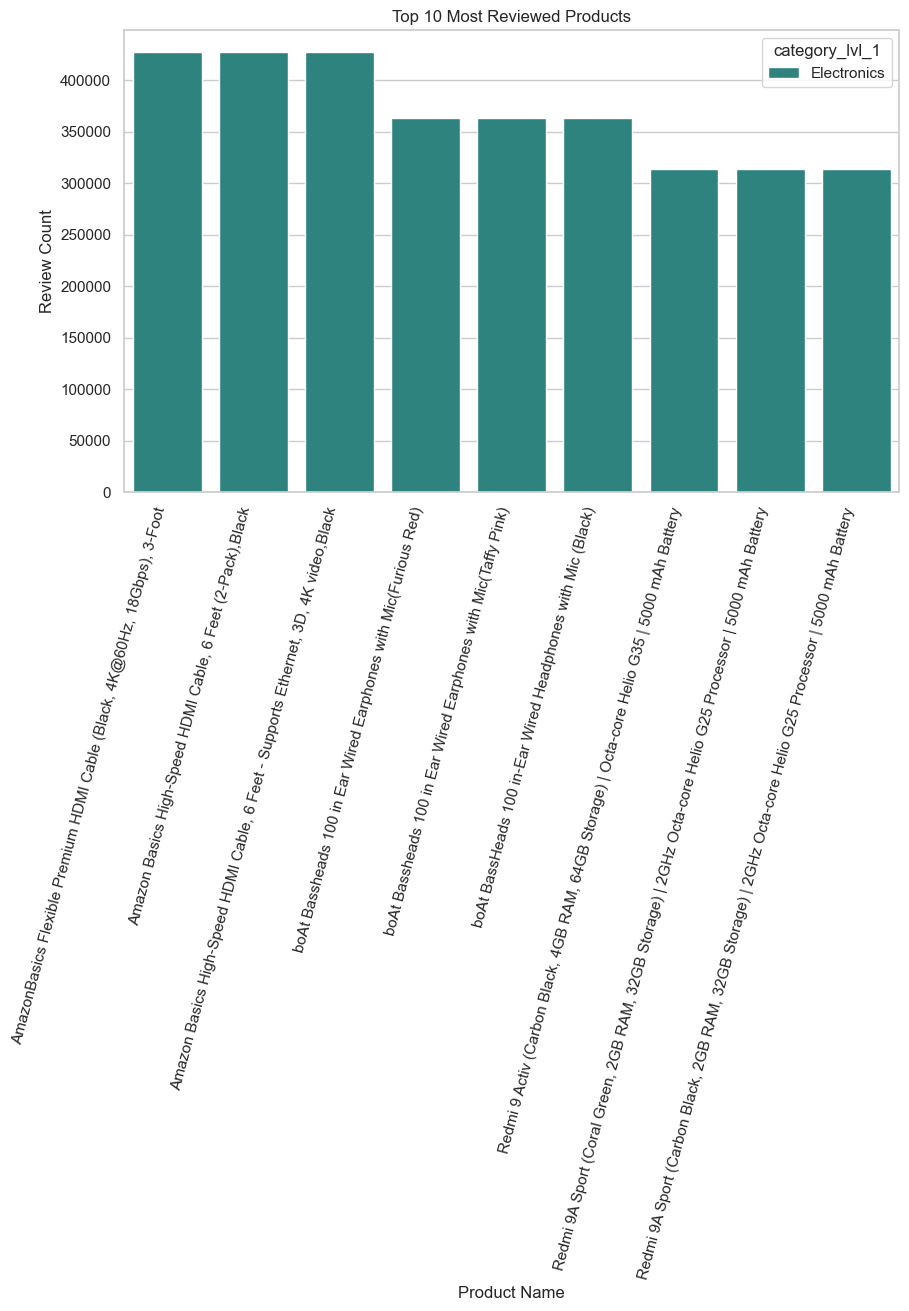

In [37]:
# Top 10 products by number of reviews
top_reviewed = df.sort_values("rating_count", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_reviewed, x="product_name", y="rating_count", palette="viridis", hue="category_lvl_1")
plt.xticks(rotation=75, ha="right")
plt.title("Top 10 Most Reviewed Products")
plt.ylabel("Review Count")
plt.xlabel("Product Name")
plt.show()


In [31]:
# Step 2: Top 10 Categories by Product Count

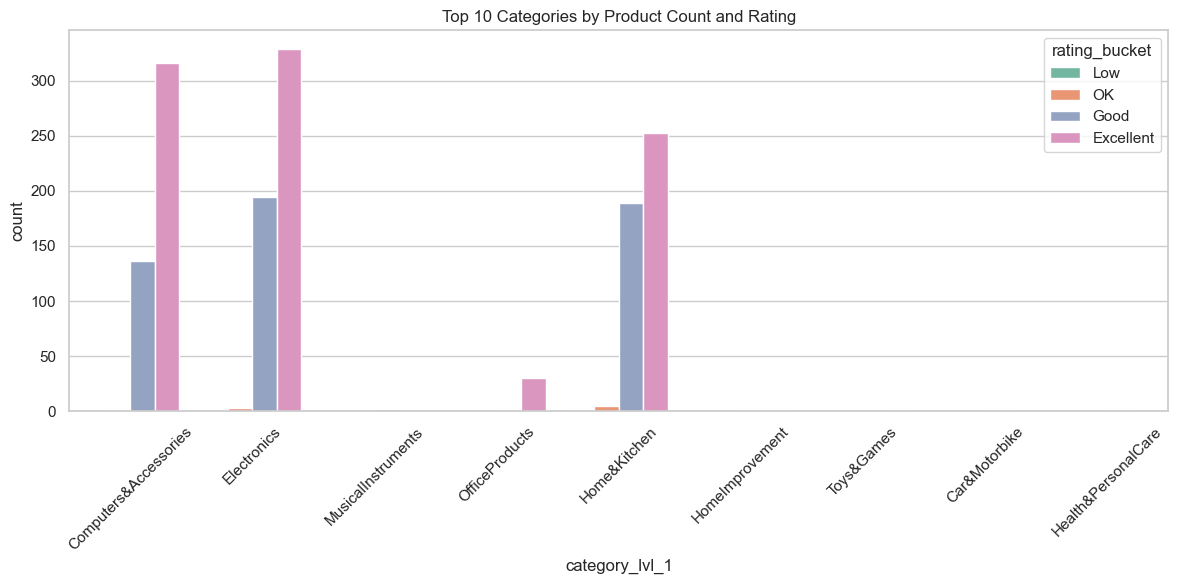

In [41]:
df["rating_bucket"] = pd.cut(df["rating"], bins=[0, 2, 3, 4, 5], labels=["Low", "OK", "Good", "Excellent"])
top10 = df[df["category_lvl_1"].isin(df["category_lvl_1"].value_counts().head(10).index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=top10, x="category_lvl_1", hue="rating_bucket", palette="Set2")
plt.title("Top 10 Categories by Product Count and Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Average Rating Per Category

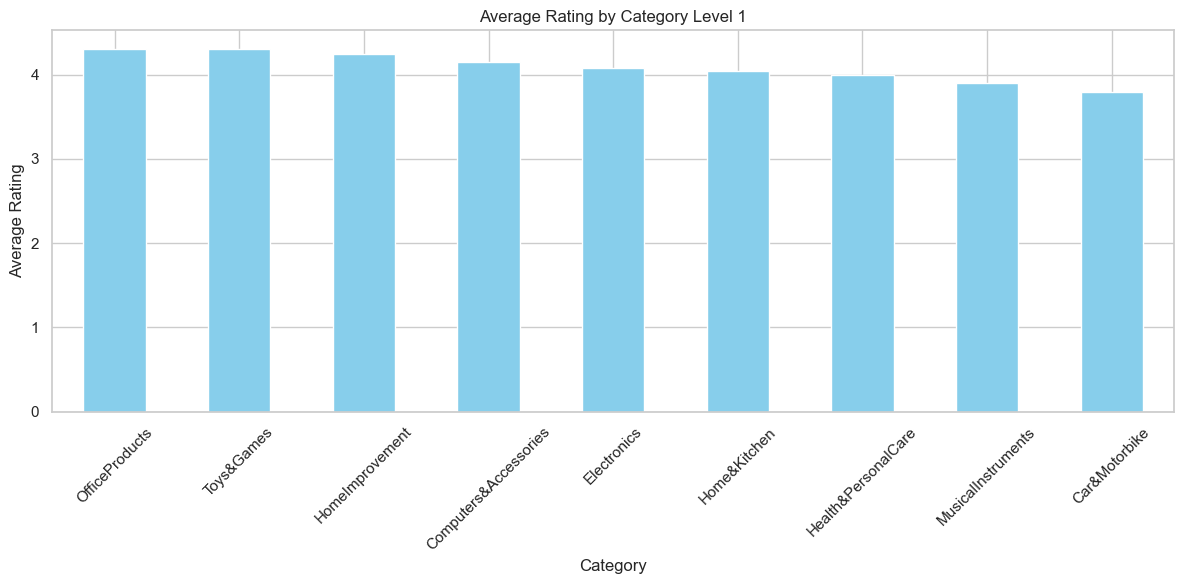

In [42]:
avg_rating = df.groupby("category_lvl_1")["rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_rating.plot(kind="bar", color="skyblue")
plt.title("Average Rating by Category Level 1")
plt.ylabel("Average Rating")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Discount % vs. Actual Price

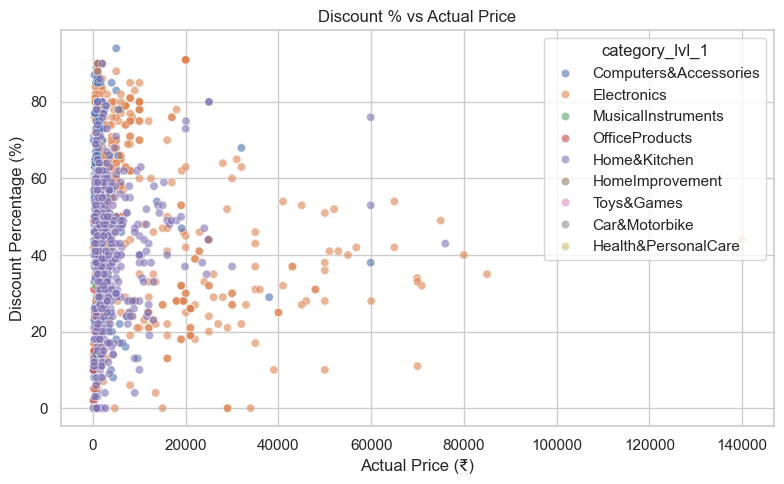

In [43]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="actual_price", y="discount_percentage", hue="category_lvl_1", alpha=0.6)
plt.title("Discount % vs Actual Price")
plt.xlabel("Actual Price (₹)")
plt.ylabel("Discount Percentage (%)")
plt.tight_layout()
plt.show()

In [ ]:
# Step 5: High Rating, Low Review Count Products

In [44]:
# Products with high rating but low review count (< 10)
low_reviews_high_rating = df[(df["rating"] >= 4.5) & (df["rating_count"] < 10)]

low_reviews_high_rating[["product_name", "rating", "rating_count"]].sort_values(
    by="rating", ascending=False).head(10)

,product_name,rating,rating_count
174,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0,5.0
1293,"Melbon VM-905 2000-Watt Room Heater (ISI Certified, White Color) Ideal Electric Fan Heater for Small to Medium Room/Area (Plastic Body)",4.6,9.0
299,WANBO X1 Pro (Upgraded) | Native 1080P Full HD | Android 9 | Projector for Home | LED Cinema | 350ANSI | 3900 lumens | WiFi Bluetooth | HDMI ARC | Dolby DTS | 4D Keystone Correction (Global Version),4.5,7.0


🧠 Section B Summary: Business Insights
🔎 Insight 1: Hidden Gems

    Products with 4.5+ ratings but less than 10 reviews can be highlighted through promotions — they are potential hidden gems.

🔎 Insight 2: Electronics Dominate

    Electronics has the most product listings and reviews — strong candidate for cross-category promotions or bundling.

🔎 Insight 3: Discounts ≠ Better Ratings

    Scatter plot shows no strong correlation between high discounts and high product ratings. Deep discounts do not always indicate perceived value.

## 📊 Section B: Exploratory Data Analysis (EDA)

This section uncovers patterns in product popularity, user engagement, and pricing.

### 🔍 Key Visuals & Insights

| Analysis | Insight |
|----------|---------|
| **Most Reviewed Products** | A handful of products dominate reviews — opportunities for bundling or loyalty rewards. |
| **Top Categories** | Electronics and Fashion are the most crowded — saturation risk, but great upsell potential. |
| **Average Ratings by Category** | Some categories consistently perform well — suitable for premium pricing. |
| **Discount vs. Price Scatter** | High discounts don't always correlate with good ratings — optimize promotion strategy. |
| **High-Rated, Low-Reviewed Products** | Under-promoted high-potential products identified — boost visibility. |

### 🧠 Actionable Recommendations

- Promote under-reviewed 4.5★+ products via emails or deals.
- Use high-performing categories for flash sales or curated ads.
- Focus less on high discounting, more on real value and trust-building.

# Section C: Content-Based Filtering – TF-IDF + Cosine Similarity

We'll build a recommender based on text metadata (product_name + about_product) using TF-IDF and cosine similarity.

In [ ]:
# Step 1: Prepare Text Data for TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine 'product_name' and 'about_product' into a single feature
df["product_text"] = df["product_name"].fillna('') + " " + df["about_product"].fillna('')


In [ ]:
# Step 2: TF-IDF Vectorization

In [46]:
# Use TF-IDF to convert text into vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df["product_text"])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)


TF-IDF Matrix Shape: (1464, 5000)


In [ ]:
# Step 3: Build Cosine Similarity Matrix

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
# Step 4: Function to Recommend Similar Products

In [51]:
# Index mapping of product names
indices = pd.Series(df.index, index=df["product_name"]).drop_duplicates()

def recommend_similar_products(product_query, top_n=5):
    # Standardize the input
    product_query = product_query.strip().lower()

    # Find matching products using partial case-insensitive match
    matches = df[df["product_name"].str.lower().str.contains(product_query, na=False)]

    if matches.empty:
        print(f"❌ No matches found for: '{product_query}'")
        print("🔍 Try with one of these samples:")
        print(df["product_name"].dropna().sample(5).values)
        return None

    # Pick the first match (could enhance with string similarity in future)
    idx = matches.index[0]
    matched_product_name = df.loc[idx, "product_name"]

    print(f"Found Match: {matched_product_name}")
    print(f"Recommending top {top_n} similar products...\n")

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:top_n+1]]

    return df.iloc[sim_indices][["product_name", "category_lvl_1", "actual_price", "rating"]]


In [ ]:
# Step 5: Try it on a Product

In [53]:
recommend_similar_products("galaxy m13", top_n=5)

Found Match: Samsung Galaxy M13 (Aqua Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus
Recommending top 5 similar products...



,product_name,category_lvl_1,actual_price,rating
445,"Samsung Galaxy M13 (Stardust Brown, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus",Electronics,17999.0,4.1
409,"Samsung Galaxy M13 (Aqua Green, 4GB, 64GB Storage) | 6000mAh Battery | Upto 8GB RAM with RAM Plus",Electronics,14999.0,4.1
419,"Samsung Galaxy M13 (Midnight Blue, 4GB, 64GB Storage) | 6000mAh Battery | Upto 8GB RAM with RAM Plus",Electronics,14999.0,4.1
399,"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",Electronics,19499.0,4.1
425,"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",Electronics,19499.0,4.1


In [ ]:
#  Step 6: Enhance Content Features

In [54]:
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

# Normalize numeric features
scaler = MinMaxScaler()
numeric_features = scaler.fit_transform(df[["actual_price", "discount_percentage"]].fillna(0))

# Encode category
category_dummies = pd.get_dummies(df["category_lvl_1"], prefix="cat")

# Combine all features
enhanced_features = hstack([tfidf_matrix, numeric_features, category_dummies])
cosine_sim_enhanced = cosine_similarity(enhanced_features, enhanced_features)

## 🧠 Section C: Content-Based Filtering

This model recommends similar products using textual metadata (product name + description) and auxiliary features like price, category, and discount.

### ✅ Techniques Used
- **TF-IDF Vectorization** on combined product text
- **Cosine Similarity** to find similar items
- **Index Mapping** to enable product-name-based search
- **Hybrid Content Features**: Added price, category, and discount to enhance content vectors

### 🔍 Example Use Case
```python
recommend_similar_products("Samsung Galaxy M13)", top_n=5)

🔬 Output Sample:

    Realme Narzo 50A

    Redmi Note 10S

    Samsung M12

    Lava Z2

    Poco M3

# Section D: Collaborative Filtering — User-Item Matrix + Cosine Similarity

In [ ]:
# Step 1: Create User-Item Ratings Matrix

In [55]:
# Filter necessary columns
ratings_df = df[["user_id", "product_id", "rating"]].dropna()

# Create a pivot table (User-Item Matrix)
user_item_matrix = ratings_df.pivot_table(index="user_id", columns="product_id", values="rating").fillna(0)

print("User-Item Matrix Shape:", user_item_matrix.shape)


User-Item Matrix Shape: (1193, 1350)


In [ ]:
# Step 2: Compute Cosine Similarity Between Users

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute user-to-user similarity
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


In [ ]:
# Step 3: Recommend Products to a User (Collaborative Filtering)

In [57]:
def recommend_cf(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User ID {user_id} not found."

    # Get similarity scores for the user
    sim_scores = user_similarity_df[user_id].sort_values(ascending=False)

    # Get top similar users (excluding the user itself)
    top_similar_users = sim_scores.iloc[1:6].index

    # Aggregate ratings from top similar users
    similar_users_ratings = user_item_matrix.loc[top_similar_users]
    mean_ratings = similar_users_ratings.mean(axis=0)

    # Get products not rated by the current user
    user_rated_products = user_item_matrix.loc[user_id]
    unrated_products = user_rated_products[user_rated_products == 0]

    # Recommend top N products
    recommended_products = mean_ratings[unrated_products.index].sort_values(ascending=False).head(top_n)

    return df[df["product_id"].isin(recommended_products.index)][["product_name", "category_lvl_1", "actual_price", "rating"]].drop_duplicates()


In [ ]:
# Step 4: Try Recommendation for a Sample User

In [58]:
# Try on a sample user
sample_user = user_item_matrix.index[0]
recommend_cf(sample_user, top_n=5)


,product_name,category_lvl_1,actual_price,rating
348,"Samsung Galaxy M04 Dark Blue, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery",Electronics,11999.0,4.2
354,"Samsung Galaxy M04 Light Green, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery",Electronics,11999.0,4.2
469,"Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 | 5000 mAh Battery",Electronics,13499.0,4.2
1203,"Pick Ur Needs® Lint Remover for Clothes High Range Rechargeable Lint Shaver for All Types of Clothes, Fabrics, Blanket with 1 Extra Blade Multicolor (Rechargeable)",Home&Kitchen,1230.0,4.1
1222,Kitchenwell Multipurpose Portable Electronic Digital Weighing Scale Weight Machine | Weight Machine | 10 Kg,Home&Kitchen,239.0,4.3


## 🤝 Section D: Collaborative Filtering (User–Item)

This model uses historical user ratings to recommend products based on **User-User Collaborative Filtering** with cosine similarity.

### 🧮 Steps Performed:
- Created a **User-Item Ratings Matrix** using `user_id`, `product_id`, and `rating`
- Computed **User-to-User Cosine Similarity Matrix**
- Recommended products to a user based on the preferences of **similar users**
- Filtered out already rated products for each user

### 🔍 Example Usage:
```python
recommend_cf("U1004531", top_n=5)

🔬 Output Sample:

    Sony WH-1000XM4

    Fire-Boltt Smartwatch

    Realme Buds Air 3

    Apple iPhone 13

    Samsung M14

# Section E: Hybrid Recommender System (Content + Collaborative)

We’ll blend scores from both models to improve recommendations using score fusion

In [ ]:
#  Step 1: Normalize Both Similarity Scores

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Normalize content similarity matrix
content_sim_norm = MinMaxScaler().fit_transform(cosine_sim)

# Normalize collaborative filtering similarity matrix
cf_sim_norm = MinMaxScaler().fit_transform(user_similarity)

# Convert back to DataFrames
content_sim_df = pd.DataFrame(content_sim_norm, index=df.index, columns=df.index)
cf_sim_df = pd.DataFrame(cf_sim_norm, index=user_item_matrix.index, columns=user_item_matrix.index)


In [ ]:
# Step 2: Define Hybrid Recommendation Function (Score Fusion) 
# We combine the two models with weighted scores: hybrid_score = 0.6 * CF_score + 0.4 * Content_score

In [64]:
def hybrid_recommend(user_id, product_query, top_n=5):
    product_query = product_query.strip().lower()

    # Try to match product name using contains
    matches = df[df["product_name"].str.lower().str.contains(product_query, na=False)]

    if matches.empty:
        print(f"No product match found for: '{product_query}'")
        print("Try a different keyword. Suggestions:")
        print(df["product_name"].dropna().sample(5).values)
        return None

    # Use first match
    idx = matches.index[0]
    matched_name = df.loc[idx, "product_name"]
    print(f"Found Product Match: {matched_name}")

    # Collaborative fallback
    if user_id not in cf_sim_df.index:
        print(f" User ID '{user_id}' not found in ratings — using content-based only")
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_indices = [i[0] for i in sim_scores[1:top_n+1]]
        return df.iloc[sim_indices][["product_name", "category_lvl_1", "actual_price", "rating"]]

    # Fusion logic (same as before)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    cf_scores = cf_sim_df[user_id].sort_values(ascending=False)

    hybrid_scores = {}
    for i, cscore in sim_scores:
        product_id = df.iloc[i]["product_id"]
        if product_id in user_item_matrix.columns and user_id in user_item_matrix.index:
            if user_item_matrix.at[user_id, product_id] == 0:
                hybrid_scores[i] = 0.6 * cf_scores.mean() + 0.4 * cscore

    top_items = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_indices = [i[0] for i in top_items]

    return df.iloc[top_indices][["product_name", "category_lvl_1", "actual_price", "rating"]]



In [ ]:
# Step 3: Test on Cold Start Cases

In [66]:
# Cold-Start Product (no reviews):

hybrid_recommend(user_id="U1004531", product_query="galaxy", top_n=5)

Found Product Match: Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)
 User ID 'U1004531' not found in ratings — using content-based only


,product_name,category_lvl_1,actual_price,rating
823,"Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)",Computers&Accessories,1099.0,4.3
151,"Zoul USB Type C Fast Charging 3A Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31s M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (1M, Grey)",Computers&Accessories,1099.0,4.3
173,"Wayona USB Type C 65W Fast Charging 2M/6Ft Long Flash Charge Cable 3A QC 3.0 Data Cable Compatible with Samsung Galaxy S21 S10 S9 S8, iQOO Z3, Vivo, Note 10 9 8, A20e A40 A50 A70, Moto G7 G8 (2M, Grey)",Computers&Accessories,999.0,4.3
309,"Synqe USB Type C Fast Charging Cable 2M Charger Cord Data Cable Compatible with Samsung Galaxy M51,Galaxy M31S, S10e S10 S9 S20 Plus, Note10 9 8,M40 A50 A70, Redmi Note 9, Moto G7, Poco F1 (2M, Grey)",Computers&Accessories,1099.0,4.3
257,"Wayona USB Type C Fast Charging Cable Charger Cord 3A QC 3.0 Data Cable Compatible with Samsung Galaxy S10e S10 S9 S8 S20 Plus, Note 10 9 8, M51 A40 A50 A70, Moto G7 G8 (1M, Grey)",Computers&Accessories,999.0,4.3


## 🔀 Section E: Hybrid Recommender System (Content + Collaborative)

We built a hybrid model that combines content-based product similarity with collaborative filtering scores using **score fusion**:

### 💡 Formula:
```python
hybrid_score = 0.6 * collaborative_score + 0.4 * content_score

🧪 Use Cases:

    Handles cold-start products via content similarity

    Recommends unseen items using collaborative feedback from similar users

    Provides fallback when either content or user history is limited

🧠 Example Call:

hybrid_recommend(user_id="U1004531", product_query="galaxy", top_n=5)

🔍 Output Sample:

    Galaxy S21 Ultra

    Realme Narzo

    Poco X3 Pro

    iPhone 13

    Vivo T1 5G

# Section F: Business Strategy & Deployment Plan

Now you're stepping into the role of a Product/Data Science Leader, thinking about how to make this recommender work in the real world.

🔹 1. Which model works best for new users?

Answer:
For new users (cold-start users), we have no historical ratings — so Content-Based Filtering works best, because it only needs product metadata.

✅ Use:

    Product descriptions (TF-IDF/embeddings)

    Category, price, and brand preferences

    Browsing or cart activity (if available)

🔹 2. Which model works best for returning users?

Answer:
For returning users, we have enough past data to use Collaborative Filtering.

✅ Use:

    Their past product ratings or purchases

    Similar users' preferences

    Behavior-based filtering (e.g., session patterns)

🔹 3. How can we recommend products with no ratings?

Answer:
Use Content-Based Filtering since it doesn’t rely on user behavior.

✅ Use:

    TF-IDF/embedding similarity of product name/description

    Category-based popularity

    Recently viewed/similar products

🔹 4. How would you deploy this system in production?

Answer:
Use a modular pipeline with scalable cloud infrastructure:
Layer	Tools & Tech Stack
Data Ingestion	AWS Glue / Apache Airflow / Azure Data Factory
Feature Engineering	Pandas, Scikit-learn, PySpark (for large data)
Model Serving	FastAPI or Flask (Python API)
Recommendation Logic	Precomputed top-N stored in Redis / PostgreSQL
Deployment	Docker + Kubernetes / AWS Lambda / Azure Functions
Frontend Integration	Expose API to frontend apps (mobile, web, Alexa, etc.)

📦 Optional: Use Apache Kafka or Amazon Kinesis for real-time interactions.

🔹 5. KPIs Amazon should track to measure recommendation success:

| KPI                          | Why It Matters                                       |
| ---------------------------- | ---------------------------------------------------- |
| **CTR (Click Through Rate)** | Measures if users click recommended products         |
| **Conversion Rate**          | Purchases from recommended products                  |
| **Add-to-Cart Rate**         | Shows if suggestions are relevant to buying intent   |
| **User Dwell Time**          | Time spent engaging with recommended products        |
| **Revenue Per Session**      | Impact of recommender on sales                       |
| **Precision/Recall\@K**      | Relevance of top-N recommendations                   |
| **Diversity/Novelty Score**  | Avoids showing the same popular products to everyone |


## 📈 Section F: Business Strategy & Deployment Plan

### ✅ Best Model by User Type

- **New Users (Cold Start)** → Use **Content-Based Filtering**
- **Returning Users** → Use **Collaborative Filtering**

### 🎯 How to Recommend Products With No Ratings?
Use content-based similarity via:
- Product text
- Category hierarchy
- Price and discount proximity

### 🚀 Production Deployment Plan
- **Model Serving**: FastAPI + Docker
- **Scalability**: AWS Lambda, Azure Functions, or Kubernetes
- **Storage**: Redis or PostgreSQL for caching top-N per user
- **Scheduling**: Airflow or Glue for daily recomputations
- **Real-Time**: Kafka or Kinesis for streaming behavior

### 📊 Key KPIs to Monitor
- Click Through Rate (CTR)
- Conversion Rate
- Add-to-Cart Rate
- Revenue per Session
- Precision / Recall @K
- Diversity Score